# KING COUNTY HOUSE PRICE PREDICTION USING ADVANCED REGRESSION ALGORITHM 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#no missing data in the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Descriptive statistics for the numeric column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
#correlation of each of the predictors with the target variable
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

<AxesSubplot:>

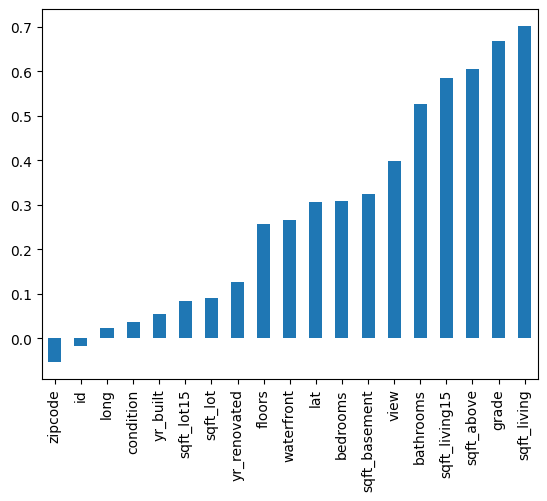

In [8]:
#visuals for correlation values
df.corr()['price'].sort_values().drop('price').plot(kind='bar')

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

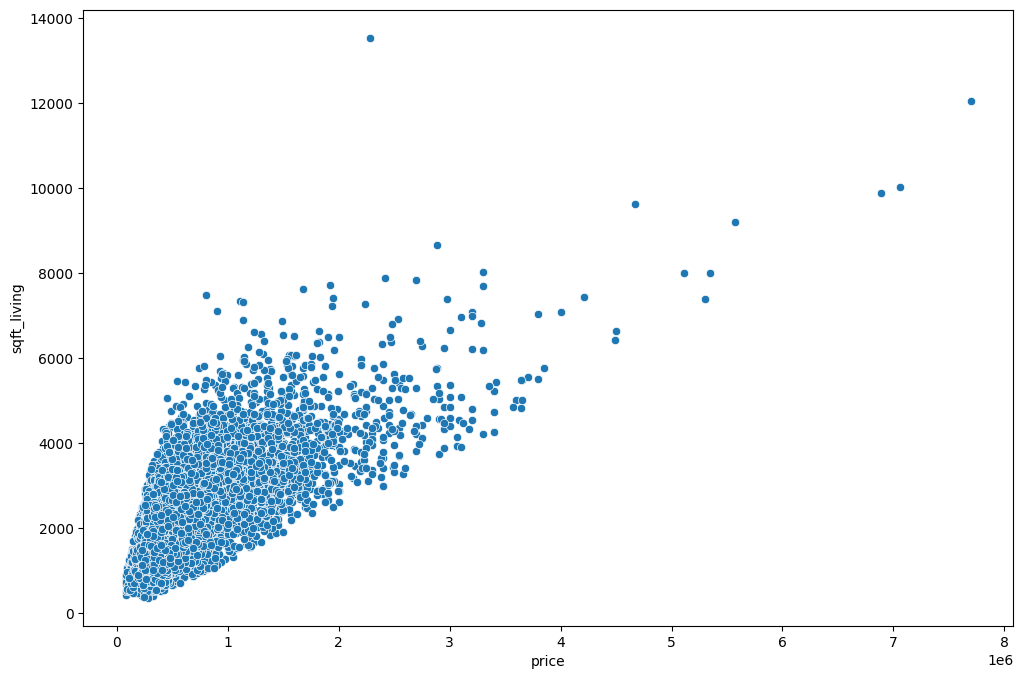

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

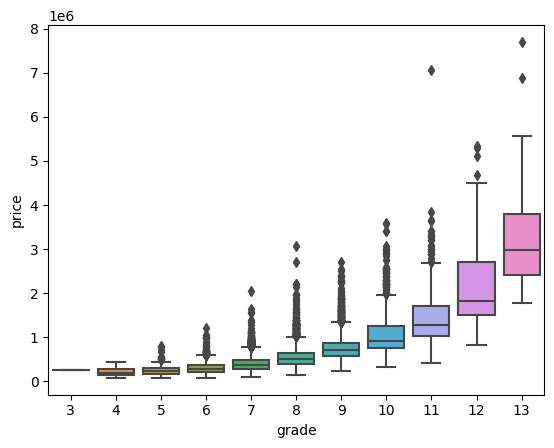

In [10]:
#The price conspicousely increase with the grade
sns.boxplot(x='grade',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='sqft_above'>

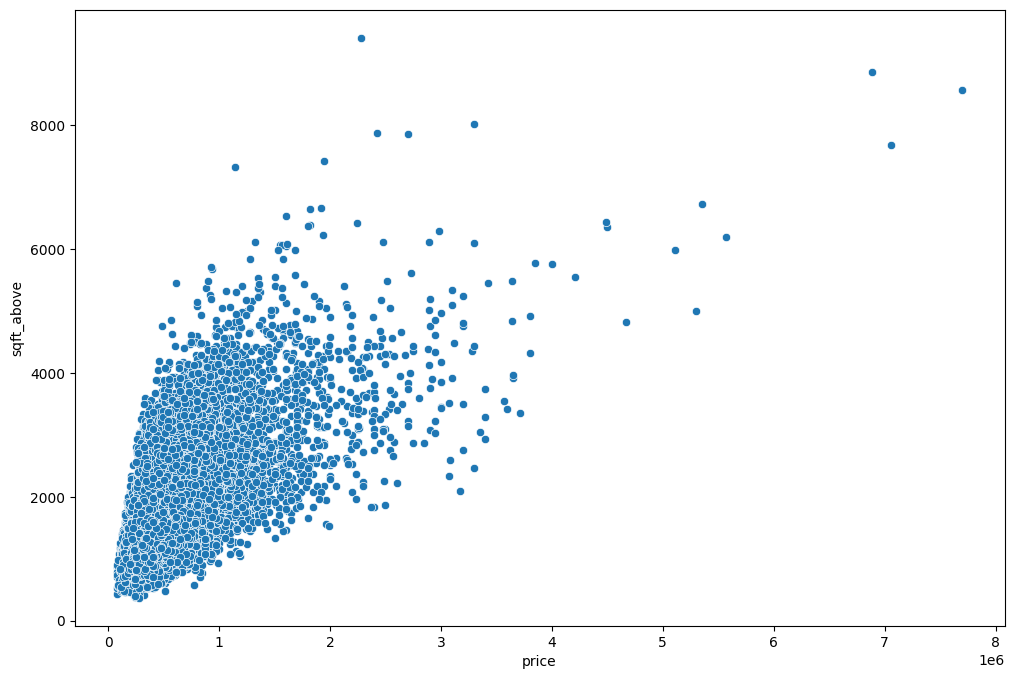

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_above',data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

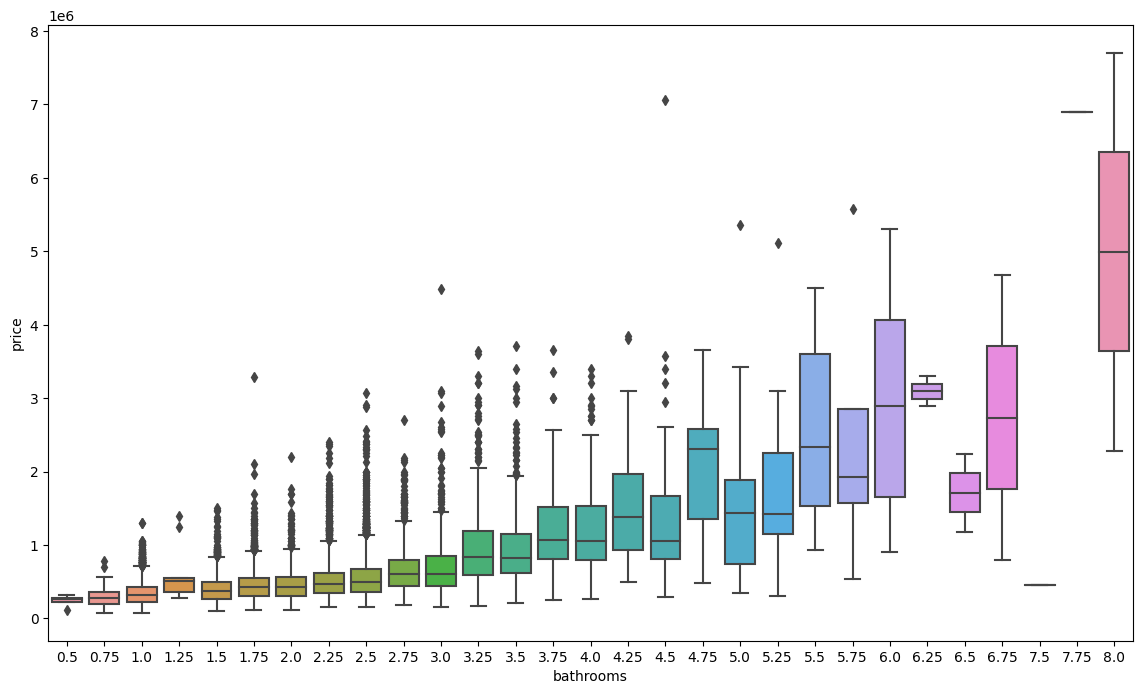

In [12]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bathrooms',y='price',data=df)

In [13]:
df['bathrooms']

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

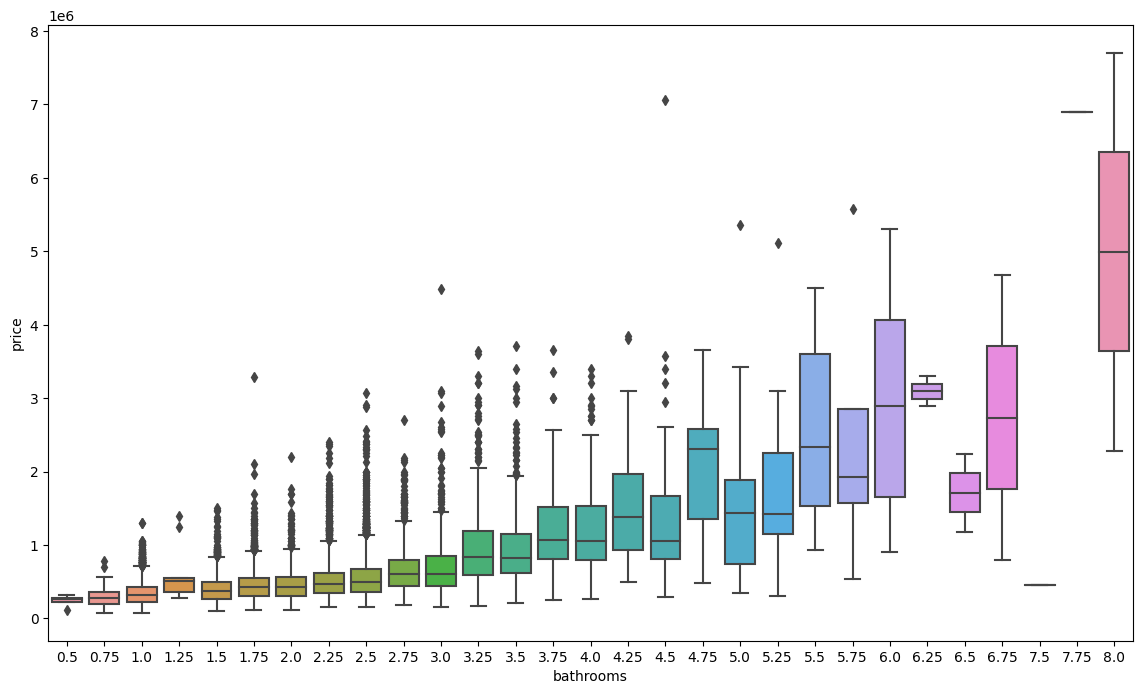

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bathrooms',y='price',data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

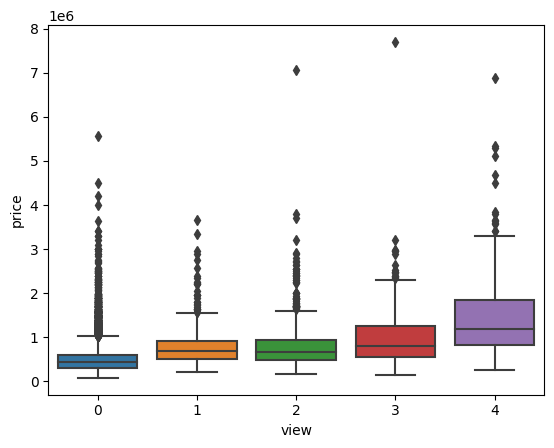

In [15]:
sns.boxplot(x='view',y='price',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

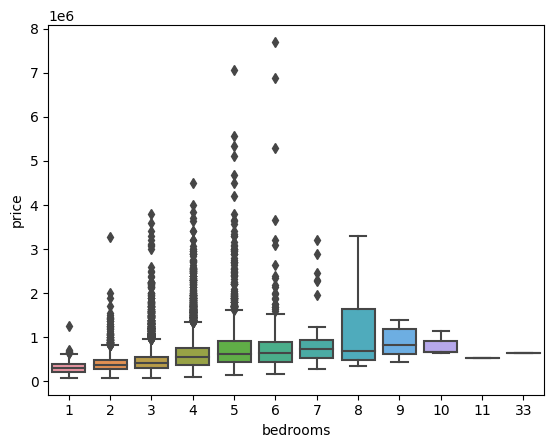

In [16]:
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

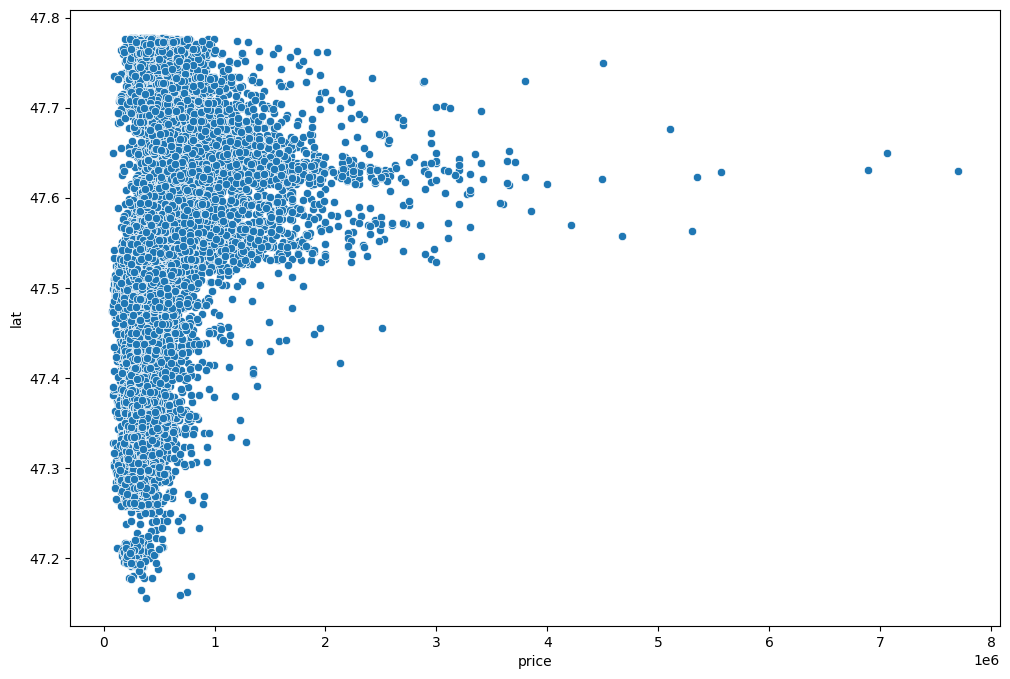

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

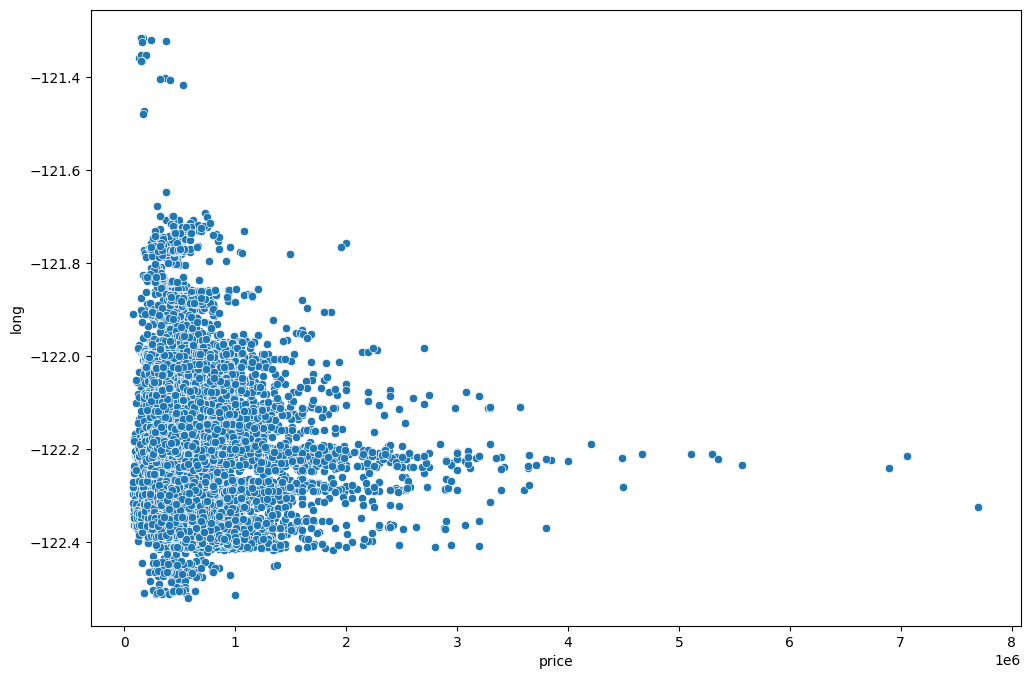

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

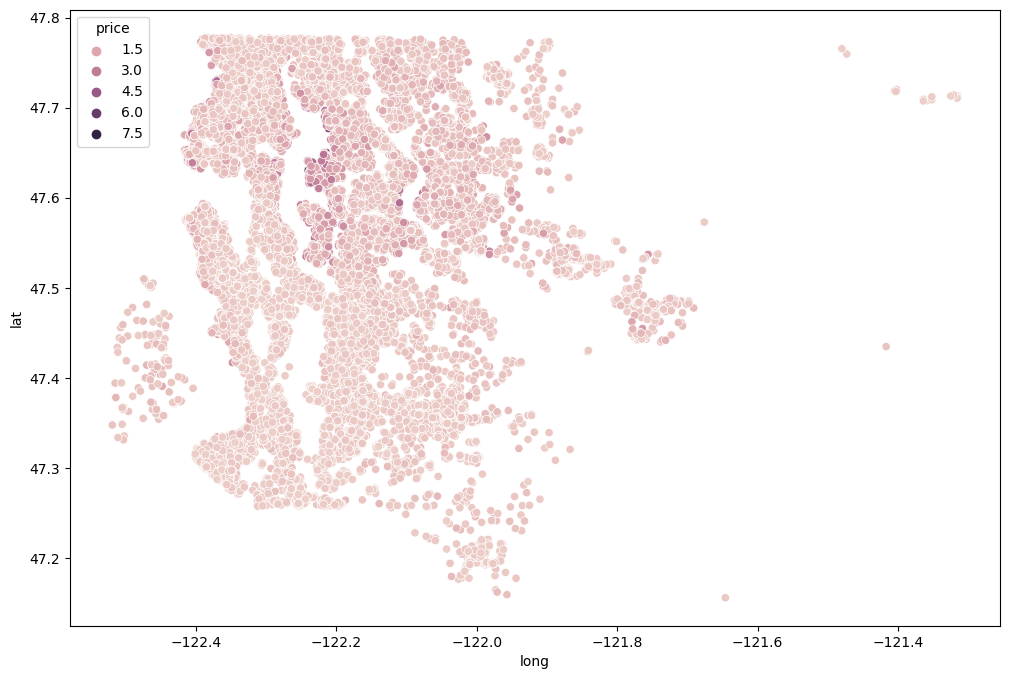

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

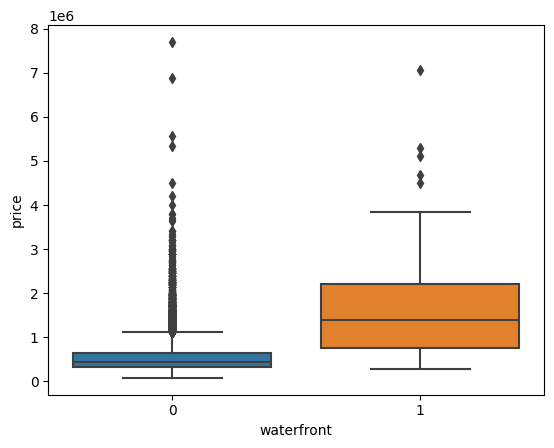

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='floors', ylabel='price'>

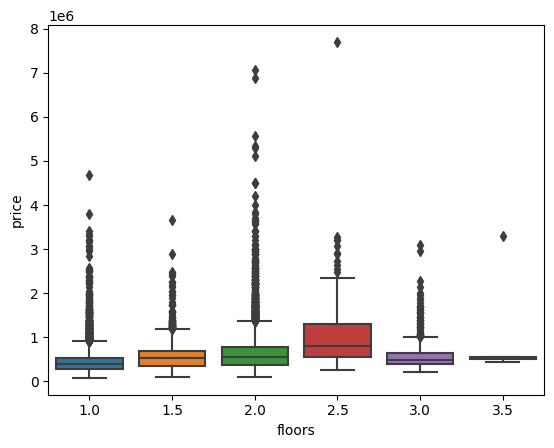

In [21]:
sns.boxplot(x='floors',y='price',data=df)

In [22]:
df_corr = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','waterfront']]
df_corr.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,waterfront
0,1180,7,1180,1340,1.00,0,0,3,0
1,2570,7,2170,1690,2.25,0,400,3,0
2,770,6,770,2720,1.00,0,0,2,0
3,1960,7,1050,1360,3.00,0,910,4,0
4,1680,8,1680,1800,2.00,0,0,3,0


(10.0, 0.0)

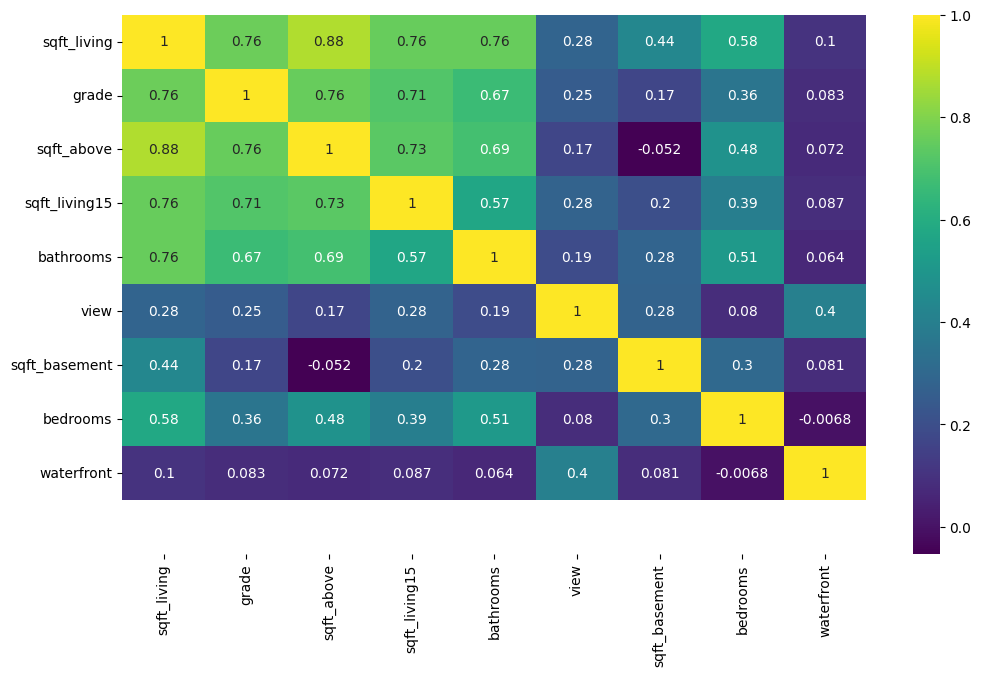

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(df_corr.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

C:\Users\HP 1O3O G2\anaconda3\envs\mlops\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='price', ylabel='Density'>

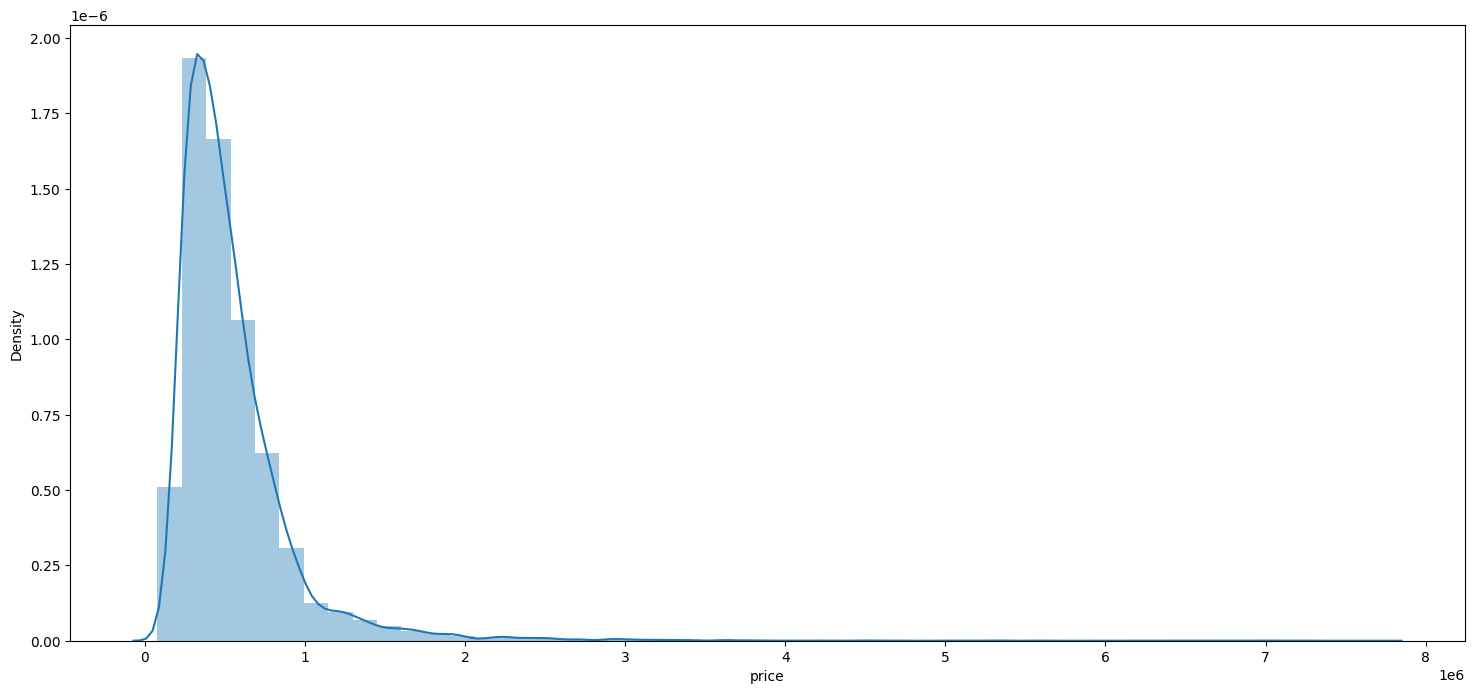

In [24]:
plt.figure(figsize=(18,8))
sns.distplot(df['price'])

## Feature Engineering

In [25]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df['month'] = df['date'].apply(lambda date:date.month)

In [28]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

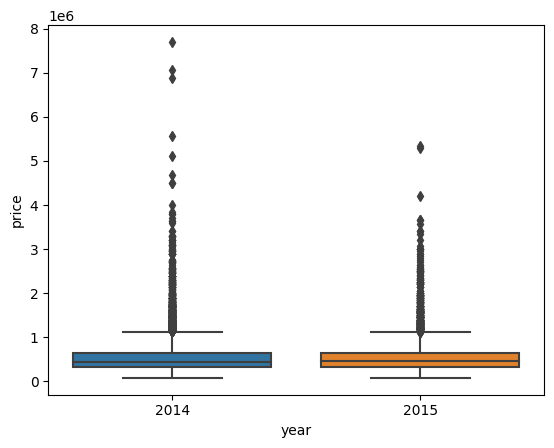

In [29]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

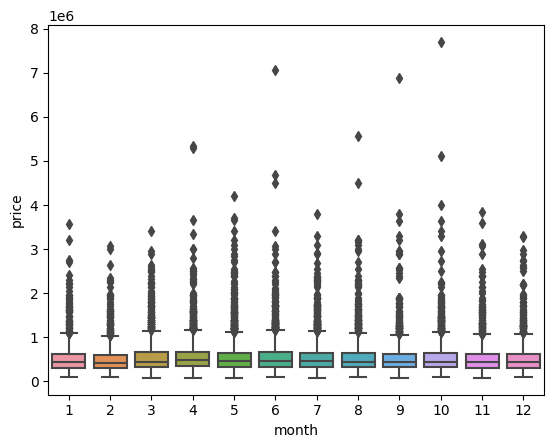

In [30]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

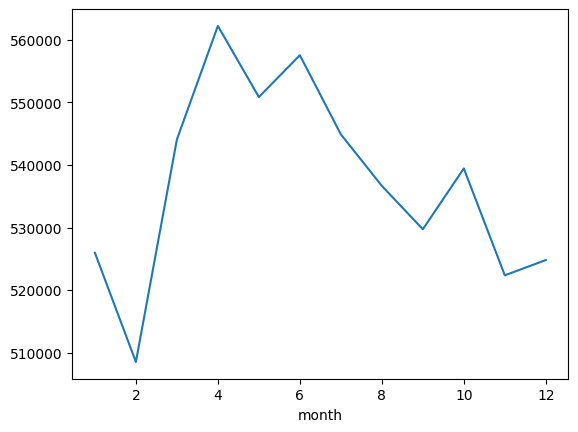

In [31]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

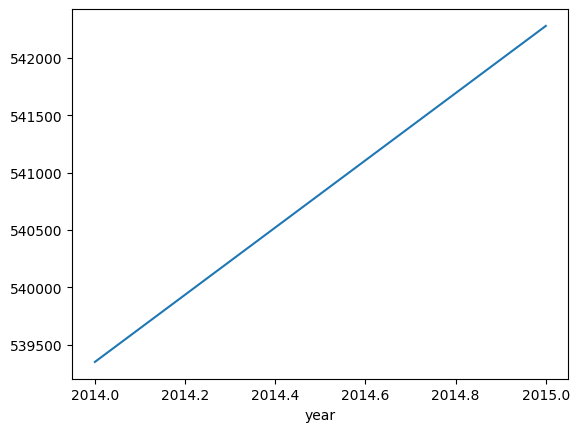

In [32]:
df.groupby('year').mean()['price'].plot()

In [33]:
df = df.drop('date',axis=1)

In [34]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [35]:
#id is just unique identifier and has no relationship with price, as confirmed by the correlation value
df = df.drop('id',axis=1)

In [36]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [37]:
df['zipcode'].nunique()

70

In [38]:
df = df.drop('zipcode', axis=1)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month 

## TRAIN TEST SPLIT AND SCALING

In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (19437, 20)
Unseen Data For Predictions (2160, 20)


In [42]:
from pycaret.regression import *

In [43]:
# initialize setup
exp_reg = setup(data = data, target = 'price', 
                session_id=123,
                normalize = True, 
                transformation = True, transform_target = True, 
                combine_rare_levels = True, rare_level_threshold = 0.05,
                remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                log_experiment = True, experiment_name = 'king_county_house_pred',
                silent=True) 

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(19437, 20)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13605, 58)"


## MODEL TRAINING

In [44]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,67093.2326,16721753671.8040,127702.3518,0.8804,0.1681,0.1228,0.2630
et,Extra Trees Regressor,72801.9971,20440259089.3301,141934.4294,0.8531,0.1820,0.1306,9.6340
rf,Random Forest Regressor,73326.1884,20896763965.4714,143658.4422,0.8485,0.1821,0.1311,10.6700
gbr,Gradient Boosting Regressor,80880.3237,24009284828.4395,153712.1784,0.8279,0.1937,0.1431,3.2010
knn,K Neighbors Regressor,99598.8833,36169581787.6118,188684.7594,0.7401,0.2404,0.1771,1.2720
br,Bayesian Ridge,113851.9957,37634838392.6394,192991.9599,0.7259,0.2616,0.2054,0.0910
ridge,Ridge Regression,113939.6391,37770441523.2000,193356.3953,0.7249,0.2616,0.2054,0.0440
huber,Huber Regressor,114025.7093,38665336472.2648,195544.6989,0.7184,0.2621,0.2056,0.8470
lr,Linear Regression,114309.2297,38687087206.4000,195650.9203,0.7184,0.2783,0.2057,0.8750
dt,Decision Tree Regressor,107192.3142,40399153867.2577,200397.2078,0.7043,0.2640,0.1944,0.2520


In [45]:
tuned_best = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68182.4512,13910471092.7775,117942.6602,0.8770,0.1751,0.1300
1,69118.2810,17600714402.9808,132667.6841,0.8810,0.1739,0.1266
2,65558.9454,13654713440.2898,116853.3844,0.8969,0.1597,0.1175
3,64757.2405,12087450172.4547,109942.9405,0.8679,0.1740,0.1285
4,73289.4100,20248917612.0428,142298.6915,0.8574,0.1754,0.1274
5,76111.0009,23497440766.3945,153288.7496,0.8545,0.1819,0.1324
6,71617.5400,33627168136.8572,183377.1200,0.7718,0.1785,0.1281
7,76881.3388,32984171288.3560,181615.4489,0.8246,0.1778,0.1294
8,65520.2485,16447749279.6778,128248.7789,0.8707,0.1641,0.1184
9,70554.5109,14654477634.3513,121055.6799,0.8906,0.1678,0.1237


In [46]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,67193.7312,13490826252.4923,116150.0162,0.8807,0.1727,0.1286
1,65507.0163,14994566689.9475,122452.3037,0.8986,0.1676,0.1209
2,65447.6154,14243672487.2327,119346.8579,0.8925,0.1588,0.1167
3,63668.2262,11095095161.8598,105333.2576,0.8788,0.1728,0.1267
4,67207.6069,14160986961.9250,118999.9452,0.9003,0.1688,0.1218
5,72193.1225,19791446486.4428,140682.0759,0.8775,0.1791,0.1292
6,67232.4032,28418391935.5967,168577.5547,0.8072,0.1705,0.1241
7,71713.0064,25591786965.4656,159974.3322,0.8639,0.1689,0.1238
8,63291.6955,13035127662.9001,114171.4836,0.8975,0.1588,0.1152
9,67477.9018,12395636114.1773,111335.6911,0.9074,0.1628,0.1211


In [47]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

tuned_lightgbm = tune_model(lightgbm, 
                            custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68194.0350,14505951998.8724,120440.6576,0.8717,0.1733,0.1284
1,64972.6359,14318237178.2318,119658.8366,0.9032,0.1662,0.1197
2,65146.3526,13813546465.9785,117531.0447,0.8957,0.1608,0.1172
3,62960.1849,11024055472.2443,104995.5022,0.8796,0.1709,0.1246
4,65654.9068,13783785406.7241,117404.3671,0.9029,0.1661,0.1197
5,68554.3685,17172489993.3558,131043.8476,0.8937,0.1767,0.1255
6,65397.0811,26428061400.8160,162567.0981,0.8207,0.1710,0.1212
7,69244.2573,23224532408.7053,152395.9724,0.8765,0.1675,0.1219
8,61634.1734,12483961601.2733,111731.6500,0.9019,0.1569,0.1124
9,66518.6084,12501069786.7588,111808.1830,0.9067,0.1621,0.1192


## MODEL EVALUATION

In [48]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

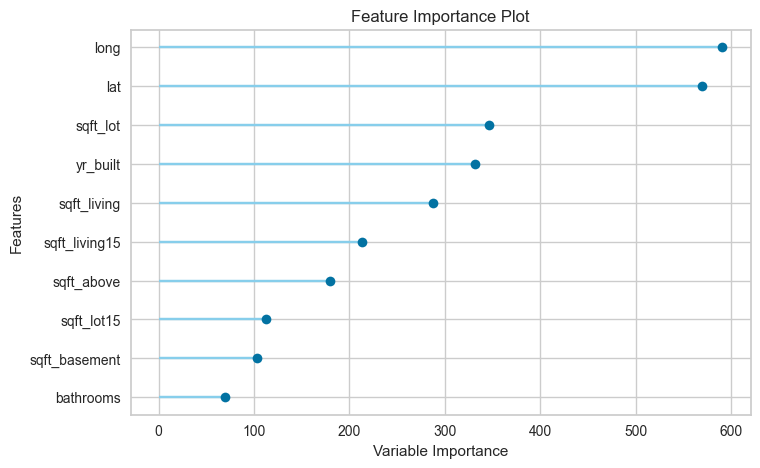

In [49]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

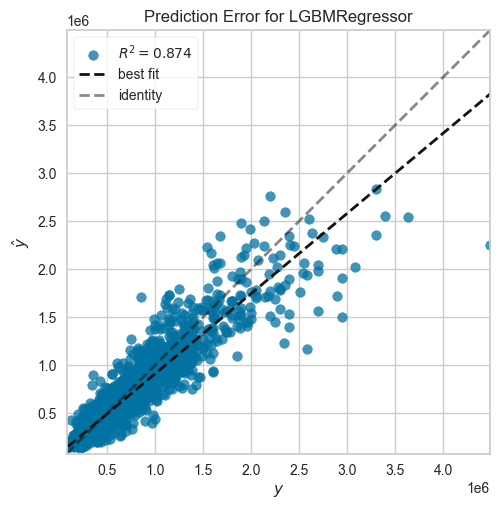

In [50]:
plot_model(tuned_best, plot = 'error')

In [51]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Evaluate model with test data

Before finalizing the model, it is recommended to perform a final check by predicting the test set and reviewing the evaluation metrics. All of the evaluation metrics we've seen above are cross-validated results based **only on the training set (70%)**. Now, we are going to use the test data to see if the performance is different and there may be overfitting.

In [52]:
predict_model(tuned_best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,68305.4678,15153544822.2182,123099.7353,0.8741,0.1718,0.1242


### MODEL FOR PRODUCTION

In [53]:
# finalize the model
final_best = finalize_model(tuned_best)

# save model to disk
save_model(final_best, 'house_price_pre-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=66,
                                    

### PREDICTION WITH UNSEEN DATA

In [54]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year,Label
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,12,2014,5.100327e+05
1,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,47.6561,-122.005,4760,101930,5,2014,1.377495e+06
2,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,47.7558,-122.229,1780,12697,5,2014,3.384499e+05
3,605000.0,4,2.50,2620,7553,2.0,0,0,3,8,...,0,1996,0,47.5301,-122.180,2620,11884,6,2014,6.005855e+05
4,345000.0,5,2.50,3150,9134,1.0,0,0,4,8,...,1510,1966,0,47.4934,-122.189,1990,9133,2,2015,4.116040e+05


In [55]:
unseen_predictions[['price','Label']]

,price,Label
0,538000.0,5.100327e+05
1,1230000.0,1.377495e+06
2,310000.0,3.384499e+05
3,605000.0,6.005855e+05
4,345000.0,4.116040e+05
...,...,...
2155,1090000.0,1.128793e+06
2156,350000.0,3.460942e+05
2157,541800.0,4.460641e+05
2158,400000.0,4.791328e+05


In [56]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.Label, 'R2')

0.8579

#### R2 for unseen data is close to R2 from cross validation hence there is not overfitting

In [57]:
import mlflow

In [ ]:
#view experiment at localhost:8000
#!mlflow ui

### INTERPRETATION USING SHAP

In [ ]:
# Global Plot Settings
fig_kwargs={'renderer': 'notebook'}
import matplotlib.pyplot as plt
plt.figure(figsize = (18,9))

interpret = interpret_model(tuned_best)

In [ ]:
interpret_model(tuned_best, plot = 'reason', observation = 1)